In [1]:
library("limma")
library("edgeR")

In [2]:
source("/ufrc/soltis/shan158538/TragFL_NewAnalysis/SLURM/rnaseq_plot_funcs.R")

In [3]:
setwd('/ufrc/soltis/shan158538/TragFL_NewAnalysis/OutPut/DE_analysis/DE_Tms_Tml')

In [4]:
targets <- readTargets()

In [5]:
print(targets)

                                files group description
1 both_counts_new_Tms_1_2_tdu_tpr.csv   Tms       Tms_1
2 both_counts_new_Tms_2_2_tdu_tpr.csv   Tms       Tms_2
3 both_counts_new_Tms_3_2_tdu_tpr.csv   Tms       Tms_3
4 both_counts_new_Tml_1_2_tdu_tpr.csv   Tml       Tml_1
5 both_counts_new_Tml_2_2_tdu_tpr.csv   Tml       Tml_2
6 both_counts_new_Tml_3_2_tdu_tpr.csv   Tml       Tml_3


In [6]:
d <- readDGE(targets, sep=",")

In [7]:
print(dim(d))

[1] 11864     6


In [8]:
colnames(d) <- c("Tms_1","Tms_2","Tms_3","Tml_1","Tml_2","Tml_3")

In [9]:
printHead(d)

$samples
                                    files group description lib.size
Tms_1 both_counts_new_Tms_1_2_tdu_tpr.csv   Tms       Tms_1   535154
Tms_2 both_counts_new_Tms_2_2_tdu_tpr.csv   Tms       Tms_2   443952
Tms_3 both_counts_new_Tms_3_2_tdu_tpr.csv   Tms       Tms_3   784709
Tml_1 both_counts_new_Tml_1_2_tdu_tpr.csv   Tml       Tml_1   475528
Tml_2 both_counts_new_Tml_2_2_tdu_tpr.csv   Tml       Tml_2   493618
Tml_3 both_counts_new_Tml_3_2_tdu_tpr.csv   Tml       Tml_3   519307
      norm.factors
Tms_1            1
Tms_2            1
Tms_3            1
Tml_1            1
Tml_2            1
Tml_3            1

$counts
                                                      Samples
Tags                                                   Tms_1 Tms_2 Tms_3 Tml_1
  Tpr_TRINITY_DN11257_c2_g1|Tdu_TRINITY_DN16696_c0_g1     63    65    63    71
  Tpr_TRINITY_DN10844_c2_g7|Tdu_TRINITY_DN25328_c2_g5    130   154   195   135
  Tpr_TRINITY_DN15383_c4_g16|Tdu_TRINITY_DN14160_c0_g1    11    30 

In [10]:
keep <- rowSums(cpm(d) > cpm(10,mean(d$samples$lib.size))[1]) >= 3
d <- d[keep,, keep.lib.sizes=FALSE]

# ">= 3" means have to meet the condidtion in as least 3 samples. This is because there are 3 replicates per species
# keep.lib.sizes=FALSE causes the library sizes to be recomputed after the filtering

In [11]:
printHead(d)

$samples
                                    files group description lib.size
Tms_1 both_counts_new_Tms_1_2_tdu_tpr.csv   Tms       Tms_1   519865
Tms_2 both_counts_new_Tms_2_2_tdu_tpr.csv   Tms       Tms_2   428029
Tms_3 both_counts_new_Tms_3_2_tdu_tpr.csv   Tms       Tms_3   762504
Tml_1 both_counts_new_Tml_1_2_tdu_tpr.csv   Tml       Tml_1   463131
Tml_2 both_counts_new_Tml_2_2_tdu_tpr.csv   Tml       Tml_2   470948
Tml_3 both_counts_new_Tml_3_2_tdu_tpr.csv   Tml       Tml_3   505558
      norm.factors
Tms_1            1
Tms_2            1
Tms_3            1
Tml_1            1
Tml_2            1
Tml_3            1

$counts
                                                      Samples
Tags                                                   Tms_1 Tms_2 Tms_3 Tml_1
  Tpr_TRINITY_DN11257_c2_g1|Tdu_TRINITY_DN16696_c0_g1     63    65    63    71
  Tpr_TRINITY_DN10844_c2_g7|Tdu_TRINITY_DN25328_c2_g5    130   154   195   135
  Tpr_TRINITY_DN15383_c4_g16|Tdu_TRINITY_DN14160_c0_g1    11    30 

In [12]:
print(dim(d))

[1] 6884    6


# After removing low counts orthologs, there are 6,884 left

In [13]:
pdf("boxplot_log-CPM.pdf")

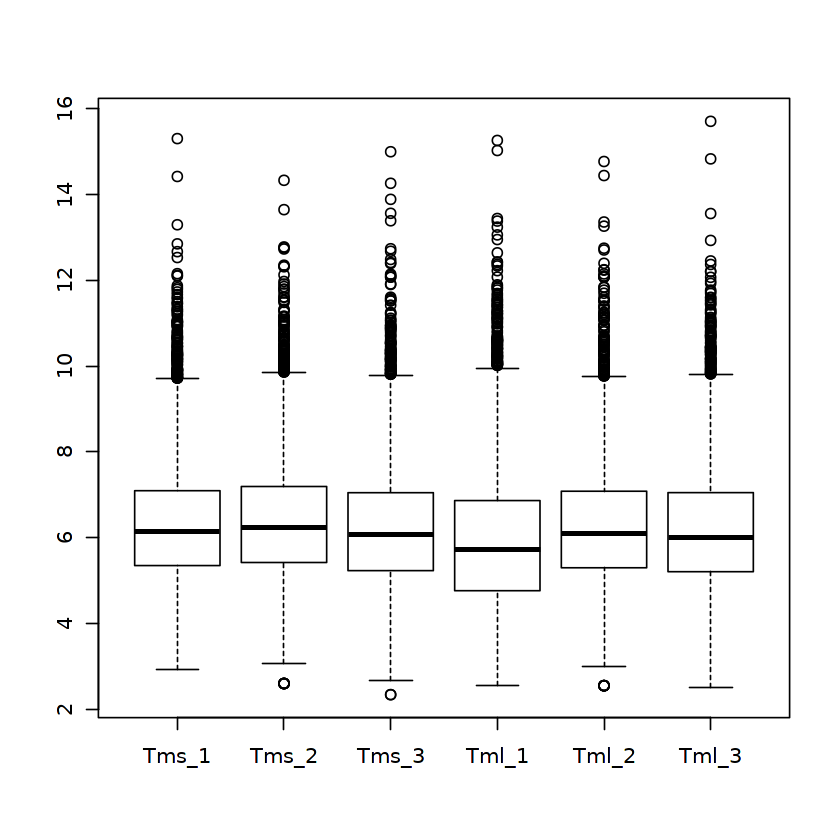

In [14]:
boxplot(cpm(d$counts + 1, log=TRUE))

In [15]:
dev.off()

pdf 
  3

In [16]:
trt = factor(c(1,1,1,2,2,2), labels=c("Tms","Tml"))

In [17]:
printHead(trt)

[1] Tms Tms Tms Tml Tml Tml
Levels: Tms Tml


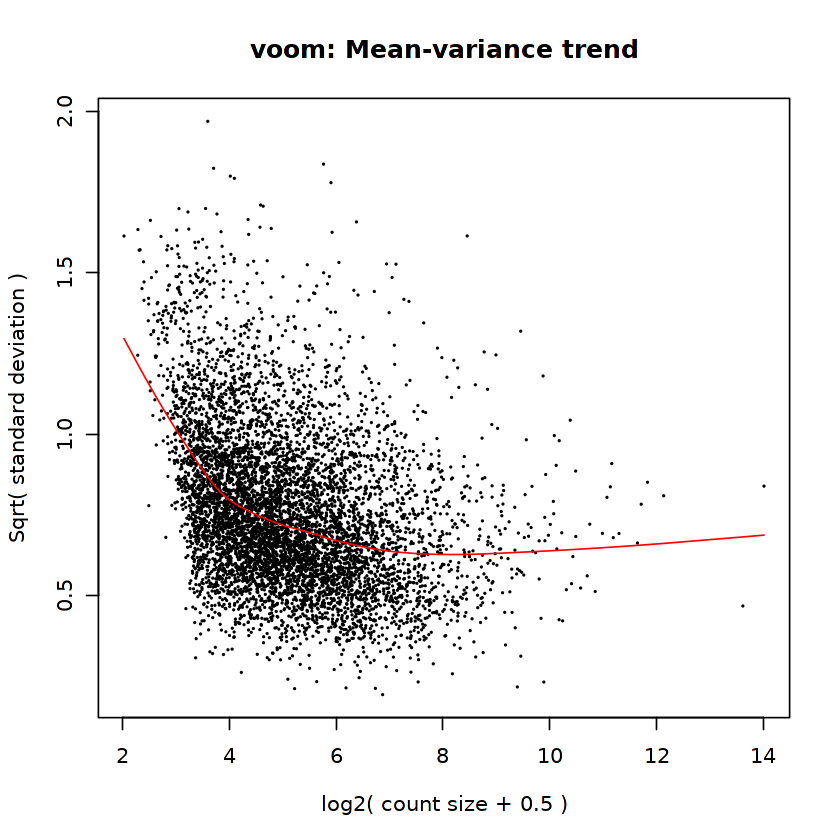

In [18]:
design=model.matrix(~0 + trt)
voom=voom(d, design, plot=TRUE)

In [19]:
write.table(voom$E, "voom_expression_values.txt", sep="\t", quote=F, row.names = TRUE)

In [20]:
fit = lmFit(voom, design)
overall_model <- eBayes(fit)

In [21]:
pdf("residual_std_dev.pdf")

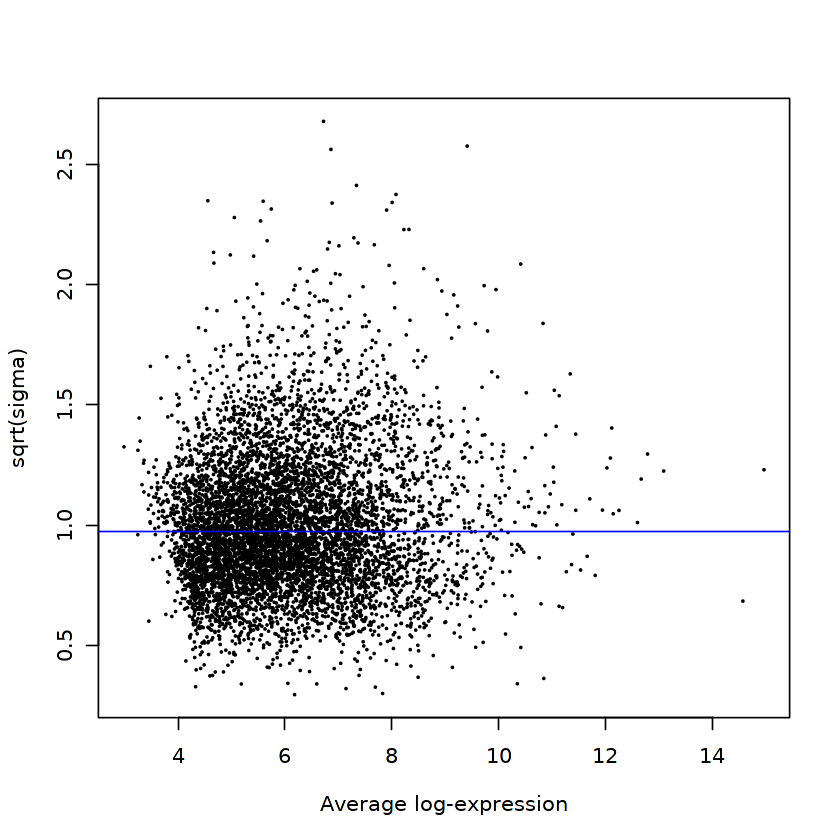

In [22]:
plotSA(overall_model)

In [23]:
dev.off()

pdf 
  3

In [24]:
topTable(overall_model, coef=ncol(design))
top=topTable(overall_model, sort="none", n=Inf, coef=ncol(design))
write.table(top, "DE_overall_model.txt", sep="\t", quote=F, row.names = TRUE)

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Tpr_TRINITY_DN13584_c4_g1|Tdu_TRINITY_DN21118_c5_g1,10.887914,10.84677,67.78214,1.038277e-12,7.475573e-10,17.35102
Tpr_TRINITY_DN11540_c1_g1|Tdu_TRINITY_DN14814_c0_g1,10.393977,10.35081,65.64125,1.355547e-12,7.475573e-10,17.29529
Tpr_TRINITY_DN13270_c4_g1|Tdu_TRINITY_DN23742_c4_g1,10.497524,10.41572,64.64936,1.538323e-12,7.475573e-10,17.22709
Tpr_TRINITY_DN11525_c2_g3|Tdu_TRINITY_DN17060_c5_g3,11.220498,11.19842,63.92169,1.689991e-12,7.475573e-10,17.09945
Tpr_TRINITY_DN11928_c4_g3|Tdu_TRINITY_DN20996_c3_g2,11.219614,11.13219,63.74554,1.729177e-12,7.475573e-10,17.08947
Tpr_TRINITY_DN12831_c0_g1|Tdu_TRINITY_DN17006_c5_g1,10.005225,10.13001,61.43417,2.350000e-12,7.475573e-10,17.08445
Tpr_TRINITY_DN10984_c0_g5|Tdu_TRINITY_DN17890_c2_g3,10.551134,10.31145,61.92180,2.200645e-12,7.475573e-10,17.05694
Tpr_TRINITY_DN13175_c1_g1|Tdu_TRINITY_DN17491_c0_g3,9.639225,9.71121,60.19413,2.783670e-12,7.475573e-10,17.03099
Tpr_TRINITY_DN13159_c0_g2|Tdu_TRINITY_DN18363_c1_g1,10.874990,10.79412,62.04165,2.165583e-12,7.475573e-10,17.02885


In [25]:
print(summary(top))

     logFC           AveExpr             t              P.Value         
 Min.   : 1.117   Min.   : 2.988   Min.   : 0.9422   Min.   :0.0000000  
 1st Qu.: 4.874   1st Qu.: 5.008   1st Qu.:11.8156   1st Qu.:0.0000000  
 Median : 5.780   Median : 5.867   Median :18.0332   Median :0.0000001  
 Mean   : 5.972   Mean   : 6.087   Mean   :20.2391   Mean   :0.0005555  
 3rd Qu.: 6.877   3rd Qu.: 6.956   3rd Qu.:26.5900   3rd Qu.:0.0000017  
 Max.   :15.267   Max.   :14.968   Max.   :72.8910   Max.   :0.3726170  
   adj.P.Val               B         
 Min.   :0.0000000   Min.   :-5.647  
 1st Qu.:0.0000000   1st Qu.: 5.782  
 Median :0.0000001   Median : 9.086  
 Mean   :0.0005598   Mean   : 8.656  
 3rd Qu.:0.0000023   3rd Qu.:12.006  
 Max.   :0.3726170   Max.   :17.351  


# Comparing Tms and Tml, results are relative to Tml

In [26]:
contrast.matrix = makeContrasts(contrasts=c("trtTms-trtTml"), levels=design)
fit2 = contrasts.fit(fit, contrast.matrix)
fit2 = eBayes(fit2)

In [27]:
topTable(fit2, coef=ncol(contrast.matrix))
top=topTable(fit2, sort="none", n=Inf, coef=ncol(contrast.matrix))
write.table(top, "DE_Tms_Tml.txt", sep="\t", quote=F, row.names = TRUE)

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Tpr_TRINITY_DN13399_c1_g2|Tdu_TRINITY_DN17584_c4_g2,-1.1208620,8.713009,-4.400546,0.002077085,0.8783607,-4.319908
Tpr_TRINITY_DN10923_c1_g7|Tdu_TRINITY_DN20142_c5_g1,-1.2951435,9.223347,-3.596488,0.006573313,0.8783607,-4.362081
Tpr_TRINITY_DN15867_c1_g5|Tdu_TRINITY_DN20151_c3_g1,-1.0793856,8.048834,-3.781556,0.005001660,0.8783607,-4.363998
Tpr_TRINITY_DN14416_c0_g4|Tdu_TRINITY_DN19856_c1_g1,-1.2869668,7.481444,-4.029393,0.003494805,0.8783607,-4.372229
Tpr_TRINITY_DN14061_c2_g5|Tdu_TRINITY_DN22178_c1_g1,1.1388861,7.094601,4.403918,0.002067479,0.8783607,-4.378398
Tpr_TRINITY_DN13439_c1_g3|Tdu_TRINITY_DN18232_c7_g1,1.1792060,8.077080,3.562266,0.006917446,0.8783607,-4.380489
Tpr_TRINITY_DN11974_c1_g2|Tdu_TRINITY_DN24006_c1_g1,-1.0188965,7.333320,-3.859056,0.004467088,0.8783607,-4.384444
Tpr_TRINITY_DN12212_c1_g1|Tdu_TRINITY_DN25024_c1_g7,0.8451768,7.598764,3.377699,0.009132443,0.8783607,-4.402698
Tpr_TRINITY_DN12489_c0_g7|Tdu_TRINITY_DN24194_c4_g3,1.6886083,6.973153,3.751505,0.005226918,0.8783607,-4.414152


In [28]:
print(summary(top))

     logFC            AveExpr             t              P.Value        
 Min.   :-3.1459   Min.   : 2.988   Min.   :-4.4887   Min.   :0.001792  
 1st Qu.:-0.1005   1st Qu.: 5.008   1st Qu.:-0.2373   1st Qu.:0.229842  
 Median : 0.2058   Median : 5.867   Median : 0.4904   Median :0.444230  
 Mean   : 0.2264   Mean   : 6.087   Mean   : 0.4160   Mean   :0.471212  
 3rd Qu.: 0.5424   3rd Qu.: 6.956   3rd Qu.: 1.1330   3rd Qu.:0.703205  
 Max.   : 4.8778   Max.   :14.968   Max.   : 4.5087   Max.   :0.999821  
   adj.P.Val            B         
 Min.   :0.8784   Min.   :-4.647  
 1st Qu.:0.8784   1st Qu.:-4.618  
 Median :0.8879   Median :-4.603  
 Mean   :0.9102   Mean   :-4.596  
 3rd Qu.:0.9368   3rd Qu.:-4.583  
 Max.   :0.9998   Max.   :-4.320  
